# Importing Libraries

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Simple Linear Regression and Multiple Linear Regression

In [3]:
train_df=pd.read_csv('/content/train_energy_data.csv')
test_df=pd.read_csv('/content/test_energy_data.csv')

In [4]:
train_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [5]:
train_df.shape,test_df.shape

((1000, 7), (100, 7))

## Simple Linear Regression

### We will only use Appliances Used feature for regression

In [6]:
X= train_df[["Appliances Used"]]
Y= train_df["Energy Consumption"]

In [7]:
X_test= test_df[["Appliances Used"]]
Y_test= test_df["Energy Consumption"]

In [8]:
simple_lr_model=LinearRegression()

In [9]:
simple_lr_model.fit(X,Y)

LinearRegression()

In [10]:
Y_pred= simple_lr_model.predict(X_test)

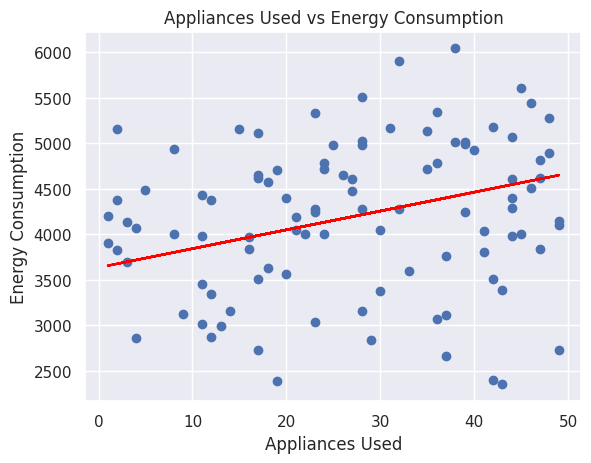

In [11]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='red')
plt.xlabel("Appliances Used")
plt.ylabel("Energy Consumption")
plt.title("Appliances Used vs Energy Consumption")
plt.show()

In [12]:
# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 673.9102154910724
R-squared: -0.0004878579126614824
Root Mean Squared Error (RMSE): 828.5886337382282


## Multiple Linear Regression

In [13]:
x= train_df.drop(["Energy Consumption"],axis=1)
y= train_df["Energy Consumption"]
x["Appliances Used per Occupant"]=x["Appliances Used"]/x["Number of Occupants"]
x["Occupant per Footage"]=x["Number of Occupants"]/x["Square Footage"]


x_test= test_df.drop(["Energy Consumption"],axis=1)
y_test= test_df["Energy Consumption"]
x_test["Appliances Used per Occupant"]=x_test["Appliances Used"]/x_test["Number of Occupants"]
x_test["Occupant per Footage"]=x_test["Number of Occupants"]/x_test["Square Footage"]

In [14]:
# Identify categorical features
categorical_features = ["Building Type","Day of Week"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
  # Fit and transform the categorical feature in the training data
  x[feature] = label_encoder.fit_transform(x[feature])
  # Transform the categorical feature in the test data
  x_test[feature] = label_encoder.transform(x_test[feature])

In [15]:
x.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Appliances Used per Occupant,Occupant per Footage
0,2,7063,76,10,29.84,0,0.131579,0.010760
1,0,44372,66,45,16.72,0,0.681818,0.001487
2,1,19255,37,17,14.30,1,0.459459,0.001922
3,2,13265,14,41,32.82,0,2.928571,0.001055
4,0,13375,26,18,11.92,0,0.692308,0.001944


In [16]:
multiple_lr_model=LinearRegression()

In [17]:
multiple_lr_model.fit(x,y)

LinearRegression()

In [18]:
y_pred= multiple_lr_model.predict(x_test)

In [19]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 332.37460927478554
R-squared: 0.8135877693495608
Root Mean Squared Error (RMSE): 357.65990925558356


# Logistic Regression

In [20]:
df=pd.read_csv("/content/breast_cancer.csv")
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [21]:
x=df.drop(["Class"],axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
437,3,1,1,3,2,1,1,1,1
256,7,9,4,10,10,3,5,3,3
584,5,2,4,1,1,1,1,1,1
18,10,7,7,6,4,10,4,1,2
350,2,1,1,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
71,9,4,5,10,6,10,4,8,1
106,1,1,1,1,2,1,2,3,1
270,10,5,7,3,3,7,3,3,8
435,4,1,1,3,1,1,2,1,1


In [23]:
classifier_model=LogisticRegression()

In [24]:
classifier_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=classifier_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9562043795620438


# Decision Tree Regressor and Classifier

## Decision Tree Regressor

In [27]:
train_df=pd.read_csv('/content/train_energy_data.csv')
test_df=pd.read_csv('/content/test_energy_data.csv')

In [28]:
x= train_df.drop(["Energy Consumption"],axis=1)
y= train_df["Energy Consumption"]

x_test= test_df.drop(["Energy Consumption"],axis=1)
y_test= test_df["Energy Consumption"]

In [29]:
# Identify categorical features
categorical_features = ["Building Type","Day of Week"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
  # Fit and transform the categorical feature in the training data
  x[feature] = label_encoder.fit_transform(x[feature])
  # Transform the categorical feature in the test data
  x_test[feature] = label_encoder.transform(x_test[feature])

In [30]:
tree_regressor=DecisionTreeRegressor()

In [31]:
tree_regressor.fit(x,y)

DecisionTreeRegressor()

In [32]:
y_pred=tree_regressor.predict(x_test)

In [33]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 178.87349999999992
R-squared: 0.923951510857201
Root Mean Squared Error (RMSE): 228.44326335657175


## Decision Tree Classifier

In [34]:
df=pd.read_csv("/content/breast_cancer.csv")

In [35]:
x=df.drop(["Class"],axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
tree_classifier=DecisionTreeClassifier()

In [37]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=tree_classifier.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9562043795620438


# Random Forest

## Random Forest Regressor

In [40]:
train_df=pd.read_csv('/content/train_energy_data.csv')
test_df=pd.read_csv('/content/test_energy_data.csv')

In [41]:
x= train_df.drop(["Energy Consumption"],axis=1)
y= train_df["Energy Consumption"]

x_test= test_df.drop(["Energy Consumption"],axis=1)
y_test= test_df["Energy Consumption"]

In [42]:
# Identify categorical features
categorical_features = ["Building Type","Day of Week"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
  # Fit and transform the categorical feature in the training data
  x[feature] = label_encoder.fit_transform(x[feature])
  # Transform the categorical feature in the test data
  x_test[feature] = label_encoder.transform(x_test[feature])

In [43]:
Rf_regressor=RandomForestRegressor()

In [44]:
Rf_regressor.fit(x,y)

RandomForestRegressor()

In [45]:
y_pred=Rf_regressor.predict(x_test)

In [46]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 95.41552200000035
R-squared: 0.9799686962126598
Root Mean Squared Error (RMSE): 117.24320151127705


## Random Forest Classifier

In [47]:
df=pd.read_csv("/content/breast_cancer.csv")

In [48]:
x=df.drop(["Class"],axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
Rf_classifier=RandomForestClassifier()

In [50]:
Rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=Rf_classifier.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9854014598540146


# Naive Bayes

In [53]:
df= pd.read_csv("/content/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [54]:
x=df.drop(["Attrition_Flag"],axis=1)
y=df["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [55]:
categorical_features = x.select_dtypes(include=['object']).columns
for feature in categorical_features:
  X_train[feature] = label_encoder.fit_transform(X_train[feature])
  X_test[feature] = label_encoder.transform(X_test[feature])

In [56]:
nb_classifier=BernoulliNB()

In [57]:
nb_classifier.fit(X_train,y_train)

BernoulliNB()

In [58]:
y_pred=nb_classifier.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.784468575189207


# SVC

In [62]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
Input_data = df.drop(columns='Outcome', axis=1)
Labels = df['Outcome']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Input_data, Labels, test_size=0.2)

In [72]:
classifier_rbf = svm.SVC( C=1.0 ,kernel='rbf')

In [73]:
classifier_rbf.fit(X_train, y_train)

SVC()

In [74]:
X_train_prediction_rbf = classifier_rbf.predict(X_train)
training_data_accuracy_rbf = accuracy_score(X_train_prediction_rbf, y_train)

print('Accuracy score of the training data : ', training_data_accuracy_rbf)

Accuracy score of the training data :  0.7768729641693811


# XGBoost

In [76]:
df=pd.read_csv("/content/synthetic_fraud_dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [81]:
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

In [82]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

In [83]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
y_pred = xgb_classifier.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost Classifier: {accuracy}")

Accuracy of XGBoost Classifier: 0.9992
